In [3]:
import pandas as pd
import numpy as np
import h5py 
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn import linear_model

In [15]:
df = pd.read_hdf("./data/Out_fin_pad(200)_x(-1.0,1.0)_E(0.01,10000.0)_eff(0.8)_100.h5")

In [16]:
df[["a"]].size

1582229

In [17]:
num_event = np.unique(df['Num']).size
num_event

299992

In [7]:
pos = df.query('Z == 1')
pos = pos.query('a == 8')

In [8]:
df

,a,inc,Z,Num,E0,Eg,Bp,fi_orb,tet_orb,fi,tet,x0,y0,z0,x_det,y_det,x_det_pad,y_det_pad
0,7.0,0.0,1.0,0.0,5.345,0.0000,0.2416,0.0,90.0,276.1860,48.5195,6.7717,-0.0007,-0.0001,-0.8157,0.3749,18.0,137.0
1,7.0,0.0,1.0,0.0,5.345,0.7823,0.2413,0.0,90.0,276.1860,48.5195,6.7770,-0.0067,-0.0007,-0.7755,0.4092,22.0,140.0
2,7.0,0.0,1.0,0.0,5.345,4.8142,0.2409,0.0,90.0,276.1860,48.5195,6.7823,-0.0127,-0.0014,-0.5312,0.3925,46.0,139.0
3,7.0,0.0,1.0,0.0,5.345,600.5468,0.2401,0.0,90.0,276.1860,48.5195,6.7862,-0.0171,-0.0019,-0.3575,0.2890,64.0,128.0
4,7.0,0.0,1.0,0.0,5.345,2.4765,0.2396,0.0,90.0,276.1860,48.5195,6.7902,-0.0216,-0.0023,0.0685,0.2812,106.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582224,5.0,0.0,1.0,299997.0,25.613,610.0252,0.1180,0.0,90.0,157.5433,51.5915,6.7896,0.0090,0.0217,-0.3553,0.4779,64.0,147.0
1582225,5.0,0.0,1.0,299997.0,25.613,2031.1881,0.1181,0.0,90.0,157.5433,51.5915,6.8002,0.0141,0.0340,-0.2175,0.6257,78.0,162.0
1582226,5.0,0.0,1.0,299997.0,25.613,26.6512,0.1182,0.0,90.0,157.5433,51.5915,6.8120,0.0198,0.0478,-0.0633,0.8679,93.0,186.0
1582227,2.0,0.0,1.0,299998.0,6.894,0.0000,0.2470,0.0,90.0,304.8320,25.0593,6.7719,-0.0003,-0.0002,0.0838,-0.5565,108.0,44.0


In [9]:
df.iloc[:, 0]
short_df = df[['Z', 'Num', 'Eg', 'x_det_pad', 'y_det_pad']]

In [10]:
short_df.query('Num == 0')

,Z,Num,Eg,x_det_pad,y_det_pad
0,1.0,0.0,0.0000,18.0,137.0
1,1.0,0.0,0.7823,22.0,140.0
2,1.0,0.0,4.8142,46.0,139.0
3,1.0,0.0,600.5468,64.0,128.0
4,1.0,0.0,2.4765,106.0,128.0
5,1.0,0.0,29.7412,140.0,125.0
6,1.0,0.0,667.9211,193.0,119.0


In [18]:
def plot_clear_one_element(df, num):
    fig, ax = plt.subplots()
    plt.xlim(0,200)
    plt.ylim(0,200)
    df = df.query('Num == @num')
    particle = df.query('Eg == 0')
    df = df.drop(df[df.Eg == 0].index)
    ax.scatter(df[['x_det_pad']], df[['y_det_pad']])
    ax.scatter(particle[['x_det_pad']], particle[['y_det_pad']], facecolor='red')
    return fig, ax


(<Figure size 640x480 with 1 Axes>, <Axes: >)

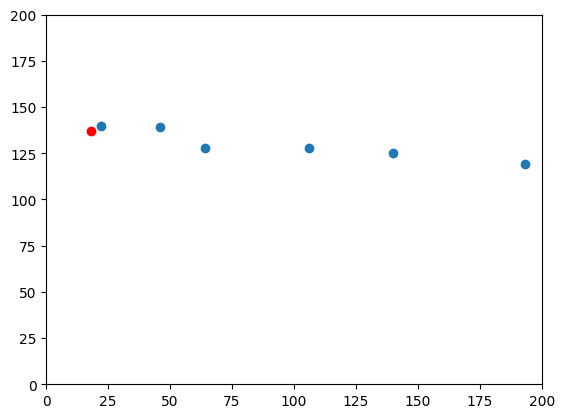

In [12]:
plot_clear_one_element(short_df, 0)

    x_det_pad  y_det_pad
0          10          2
1          87        192
2          23         57
3         123         13
4          93          7
5         191         23
6         100         85
7         150        106
8         173         61
9         125         25
10         48         70
11         71        198
12        114         18
13         15         38


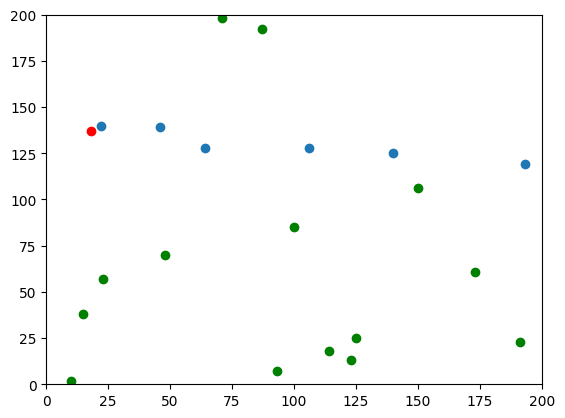

In [21]:
def generate_uniform(df, num, size):
    df = df.query('Num == @num')
    particle = df.query('Eg == 0')
    x = particle.iloc[0]['x_det_pad']
    y = particle.iloc[0]['y_det_pad']
    size_df = df.iloc[:, 0].size
    xarr = uniform.rvs(scale = 199, size = size * size_df)
    yarr = uniform.rvs(scale = 199, size = size * size_df)
    return pd.DataFrame({'x_det_pad': xarr.astype(int), 'y_det_pad': yarr.astype(int)})
generate_uniform(short_df, 0, 2)

_PHOTON_NUM_SCALE = 2

def plot_with_uniform_one_elemnet(df, num):
    fig, ax = plot_clear_one_element(df, num)
    noize = generate_uniform(df, num, _PHOTON_NUM_SCALE)
    print(noize)
    ax.scatter(noize[['x_det_pad']], noize[['y_det_pad']], facecolor= 'green')

plot_with_uniform_one_elemnet(short_df, 0)

In [20]:
test0noize = generate_uniform(short_df, 0, 2)
test_df = short_df.query('Num == 0')